In this script we are going to implement one of my favourite strategies: We are going to trade for example $MSFT using a IBS, MOM(32) and ROC(64). 
The logic is simple: 
- When MoM > ROC we have a bullish trend however when IBS is High(>0.90 percentile), lets say we sell.
- When MoM < ROC we have a bearish trend however when the IBS is low (< 0.10 percentile), lets say we buy.
Finally, I did a backtest of the strategy however is not GOOOD ENOUGH. I do not use commisions.

[*********************100%%**********************]  1 of 1 completed


Compra: 2018-04-09 00:00:00 a 90.77 USD
Venta: 2018-05-09 00:00:00 a 96.94 USD
Compra: 2018-06-15 00:00:00 a 100.13 USD
Venta: 2018-11-30 00:00:00 a 110.89 USD
Compra: 2019-03-22 00:00:00 a 117.05 USD
Venta: 2019-11-08 00:00:00 a 145.96 USD
Compra: 2020-01-10 00:00:00 a 161.34 USD
Venta: 2020-02-10 00:00:00 a 188.70 USD
Compra: 2020-02-25 00:00:00 a 168.07 USD
Venta: 2020-04-14 00:00:00 a 173.70 USD
Compra: 2020-04-20 00:00:00 a 175.06 USD
Venta: 2020-04-24 00:00:00 a 174.55 USD
Compra: 2020-06-11 00:00:00 a 186.27 USD
Venta: 2020-10-05 00:00:00 a 210.38 USD
Compra: 2020-10-19 00:00:00 a 214.22 USD
Venta: 2020-12-02 00:00:00 a 215.37 USD
Compra: 2020-12-10 00:00:00 a 210.52 USD
Venta: 2021-01-25 00:00:00 a 229.53 USD
Compra: 2021-03-08 00:00:00 a 227.39 USD
Venta: 2021-04-09 00:00:00 a 255.85 USD
Compra: 2021-05-27 00:00:00 a 249.31 USD
Venta: 2021-07-09 00:00:00 a 277.94 USD
Compra: 2021-08-26 00:00:00 a 299.09 USD
Venta: 2021-09-16 00:00:00 a 305.22 USD
Compra: 2021-09-17 00:00:00 a 

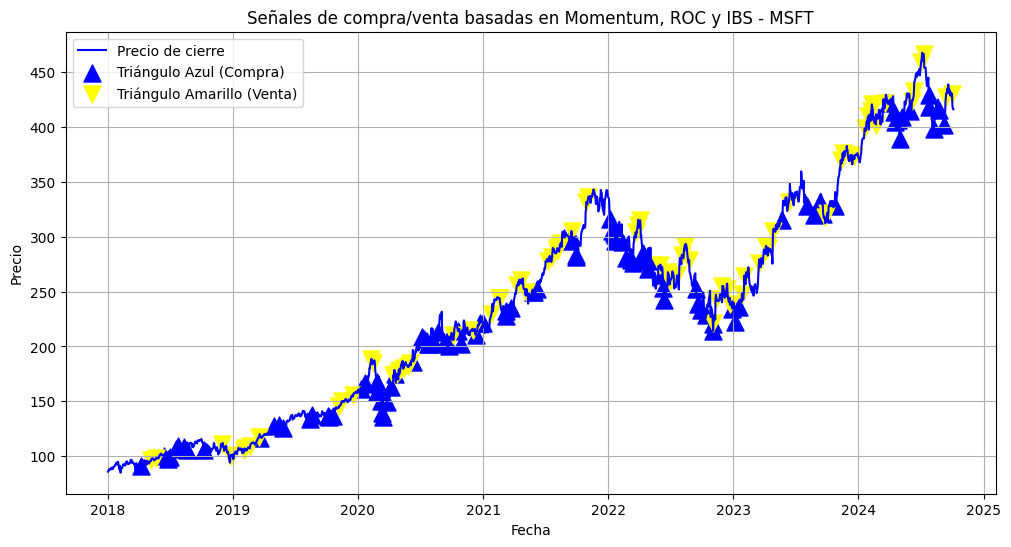

Rentabilidad por operación: 141.01% por operación


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Descargar datos de MSFT
data = yf.download('MSFT', start='2018-01-01', end='2024-12-31')

# Calcular el Momentum (32 periodos)
momentum_32 = data['Close'].diff(32)

# Calcular el ROC (64 periodos)
roc_64 = ((data['Close'] - data['Close'].shift(64)) / data['Close'].shift(64)) * 100

# Calcular el Internal Bar Strength (IBS)
ibs = (data['Close'] - data['Low']) / (data['High'] - data['Low'])

# Crear señales de compra (triángulo azul) y venta (triángulo amarillo) basadas en IBS
buy_signals = np.where((ibs < 0.1) & (momentum_32 < roc_64), data['Close'], np.nan)
sell_signals = np.where((ibs > 0.95) & (momentum_32 > roc_64), data['Close'], np.nan)

# Almacenar las señales de compra y venta en un DataFrame para análisis posterior
signals = pd.DataFrame(index=data.index)
signals['Buy'] = buy_signals
signals['Sell'] = sell_signals

# Simular una estrategia de inversión basada en las señales
initial_capital = 10000  # Capital inicial en USD
position = 0  # Estado inicial: sin posición
capital = initial_capital
returns = []

for i in range(len(signals)):
    # Si hay una señal de compra y no estamos en una posición
    if not np.isnan(signals['Buy'].iloc[i]) and position == 0:
        # Comprar al precio de cierre
        position = capital / data['Close'].iloc[i]
        print(f"Compra: {data.index[i]} a {data['Close'].iloc[i]:.2f} USD")
    
    # Si hay una señal de venta y estamos en una posición
    elif not np.isnan(signals['Sell'].iloc[i]) and position > 0:
        # Vender al precio de cierre
        capital = position * data['Close'].iloc[i]
        position = 0
        print(f"Venta: {data.index[i]} a {data['Close'].iloc[i]:.2f} USD")
        # Registrar la rentabilidad en porcentaje
        returns.append(capital / initial_capital - 1)

# Calcular el retorno total
total_return = (capital - initial_capital) / initial_capital * 100
print(f"\nCapital final: {capital:.2f} USD")
print(f"Rentabilidad total: {total_return:.2f}%")

# Graficar el retorno acumulado
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Precio de cierre', color='blue')

# Señales de compra y venta
plt.scatter(data.index, buy_signals, label='Triángulo Azul (Compra)', marker='^', color='blue', s=150)
plt.scatter(data.index, sell_signals, label='Triángulo Amarillo (Venta)', marker='v', color='yellow', s=150)

plt.title('Señales de compra/venta basadas en Momentum, ROC y IBS - MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los retornos de cada operación
if returns:
    print(f"Rentabilidad por operación: {np.mean(returns)*100:.2f}% por operación")
else:
    print("No hubo suficientes señales para generar operaciones.")


Now lets optimise the IBS`s percentiles to find what are the best to buy and sell

[*********************100%%**********************]  1 of 1 completed


Mejores percentiles para IBS: Compra: 0.01, Venta: 0.99
Mejor Ratio de Sharpe: 1.3487
Capital total generado con la estrategia: 35211.77 USD


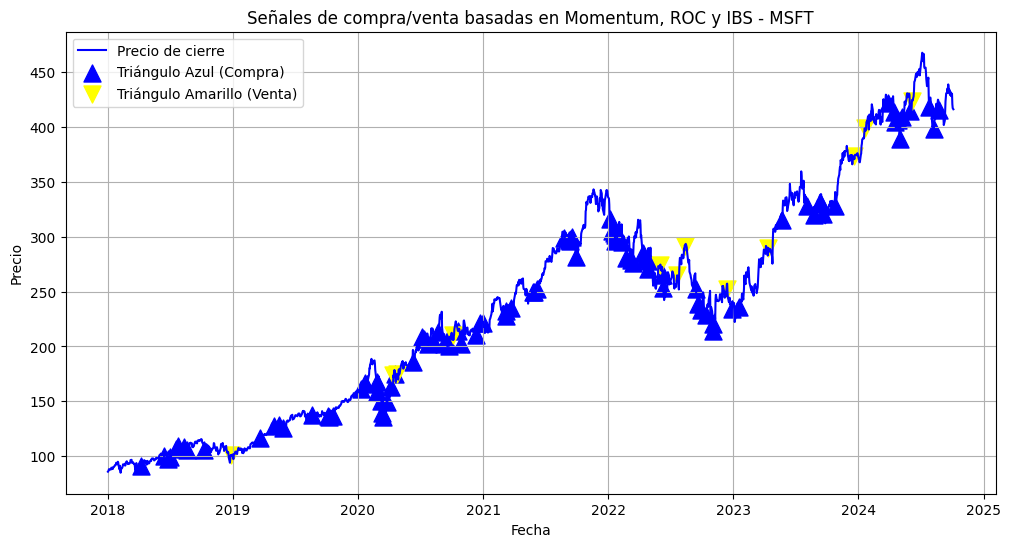

Rentabilidad media por operación: 14.35%
Rentabilidad de la peor operación: -0.29%


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos de MSFT
data = yf.download('MSFT', start='2018-01-01', end='2024-12-31')

# Calcular el Momentum (32 periodos)
momentum_32 = data['Close'].diff(32)

# Calcular el ROC (64 periodos)
roc_64 = ((data['Close'] - data['Close'].shift(64)) / data['Close'].shift(64)) * 100

# Configuraciones para optimización
best_sharpe = -np.inf
best_params = (0, 0)
results = []

# Rango de percentiles para optimización
for buy_percentile in np.arange(0.01, 0.10, 0.01):
    for sell_percentile in np.arange(0.90, 1.00, 0.01):
        
        # Calcular el Internal Bar Strength (IBS)
        ibs = (data['Close'] - data['Low']) / (data['High'] - data['Low'])
        
        # Crear señales de compra (triángulo azul) y venta (triángulo amarillo) basadas en IBS
        buy_signals = np.where((ibs < buy_percentile) & (momentum_32 < roc_64), data['Close'], np.nan)
        sell_signals = np.where((ibs > sell_percentile) & (momentum_32 > roc_64), data['Close'], np.nan)

        # Almacenar las señales de compra y venta en un DataFrame para análisis posterior
        signals = pd.DataFrame(index=data.index)
        signals['Buy'] = buy_signals
        signals['Sell'] = sell_signals

        # Simular una estrategia de inversión basada en las señales
        initial_capital = 10000  # Capital inicial en USD
        position = 0  # Estado inicial: sin posición
        capital = initial_capital
        returns = []
        trade_returns = []  # Almacenar rentabilidad de cada operación

        for i in range(len(signals)):
            # Si hay una señal de compra y no estamos en una posición
            if not np.isnan(signals['Buy'].iloc[i]) and position == 0:
                # Comprar al precio de cierre
                position = capital / data['Close'].iloc[i]
                buy_price = data['Close'].iloc[i]  # Guardar precio de compra
            
            # Si hay una señal de venta y estamos en una posición
            elif not np.isnan(signals['Sell'].iloc[i]) and position > 0:
                # Vender al precio de cierre
                capital = position * data['Close'].iloc[i]
                trade_return = (data['Close'].iloc[i] - buy_price) / buy_price  # Rentabilidad de la operación
                trade_returns.append(trade_return)
                position = 0

        # Calcular el retorno esperado y la volatilidad
        if trade_returns:
            mean_return = np.mean(trade_returns)
            worst_return = np.min(trade_returns)  # Rentabilidad de la peor operación
            volatility = np.std(trade_returns)
            sharpe_ratio = mean_return / volatility if volatility != 0 else 0
            
            # Actualizar el mejor ratio de Sharpe y los mejores parámetros
            if sharpe_ratio > best_sharpe:
                best_sharpe = sharpe_ratio
                best_params = (buy_percentile, sell_percentile)

            results.append((buy_percentile, sell_percentile, sharpe_ratio))

# Imprimir los mejores parámetros
print(f"Mejores percentiles para IBS: Compra: {best_params[0]:.2f}, Venta: {best_params[1]:.2f}")
print(f"Mejor Ratio de Sharpe: {best_sharpe:.4f}")

# Mostrar capital final generado con la estrategia
final_capital = capital  # Capital final después de todas las operaciones
print(f"Capital total generado con la estrategia: {final_capital:.2f} USD")

# Graficar el rendimiento de las operaciones
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Precio de cierre', color='blue')

# Señales de compra y venta
plt.scatter(data.index, buy_signals, label='Triángulo Azul (Compra)', marker='^', color='blue', s=150)
plt.scatter(data.index, sell_signals, label='Triángulo Amarillo (Venta)', marker='v', color='yellow', s=150)

plt.title('Señales de compra/venta basadas en Momentum, ROC y IBS - MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Rentabilidad media y peor operación
if trade_returns:
    print(f"Rentabilidad media por operación: {np.mean(trade_returns) * 100:.2f}%")
    print(f"Rentabilidad de la peor operación: {worst_return * 100:.2f}%")
else:
    print("No hubo suficientes señales para generar operaciones.")
